# Cookie Cats Player Retention

Cookie Cats is a classic "connect three"-style puzzle game where the player must connect tiles of the same color to clear the board and win the level. It also features singing cats.

[insert image]

As players progress further in the game, they will encounter gates that force them to do one of two things:
1. Make an in-app purchase to proceed immediately
2. Wait a fairly long period of time before continuing

Aside from generating revenue for the game, the gates serve as an important break from the game, hopefully leaving the player wanting to see more of the game and prolonging their enjoyment. 

Does placing the gate at a different location impact player retention? In this project, we are going to analyze an AB-test where we moved the first gate from level 30 to level 40.

In [1]:
# Run this cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading in the data
df = pd.read_csv('cookie_cats.csv')

# Showing the first few rows
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [3]:
# Sanity Check - Counting the number of players in each AB group.
df['version'].value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

Text(0, 0.5, 'User Count')

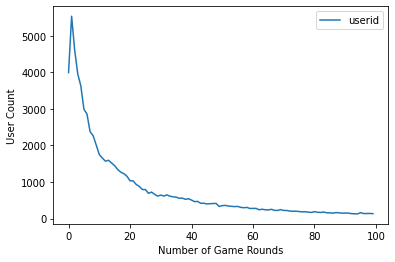

In [4]:
plot_df = df.groupby('sum_gamerounds', as_index=False).count()
# Plotting the distribution of players that played 0 to 100 game rounds
ax = plot_df.head(n=100).plot(x="sum_gamerounds", y="userid")
ax.set_xlabel("Number of Game Rounds")
ax.set_ylabel("User Count")

In [5]:
# Looking at Retention Rate after a day of installing
df['retention_1'].sum() / df['retention_1'].count()

0.4452095044850259

In [6]:
# For both AB groups
df.groupby('version')['retention_1'].sum() / df.groupby('version')['userid'].count()

version
gate_30    0.448188
gate_40    0.442283
dtype: float64

<AxesSubplot:ylabel='Density'>

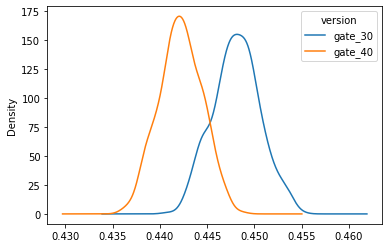

In [7]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
iterations = 500
for i in range(iterations):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='kde')

In [8]:
boot_1d.head()

version,gate_30,gate_40
retention_1,0.449655,0.439642
retention_1,0.443019,0.443948
retention_1,0.446615,0.442000
retention_1,0.449520,0.437488
retention_1,0.448550,0.442607


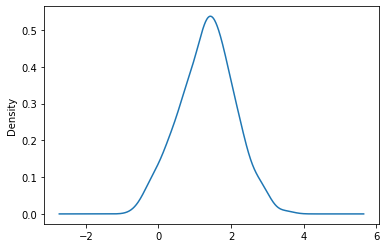

In [9]:
# Adding a column with the % difference between the two AB-groups
boot_1d['percentage diff'] = (boot_1d['gate_30'] - boot_1d['gate_40'])/boot_1d['gate_40'] * 100

# Ploting the bootstrap % difference
ax = boot_1d['percentage diff'].plot(kind='kde')

In [10]:
boot_1d.head()

version,gate_30,gate_40,percentage diff
retention_1,0.449655,0.439642,2.277446
retention_1,0.443019,0.443948,-0.209193
retention_1,0.446615,0.442000,1.044189
retention_1,0.449520,0.437488,2.750435
retention_1,0.448550,0.442607,1.342728


In [12]:
# Calculating the probability that 1-day retention is greater when the gate is at level 30
prob = sum(boot_1d['percentage diff'] > 0) / len(boot_1d['percentage diff'] > 0)
'{:.1%}'.format(prob)

'95.2%'

In [13]:
sum(df['retention_7'])/len(df['retention_7'])

0.1860648194347426

'100.0%'

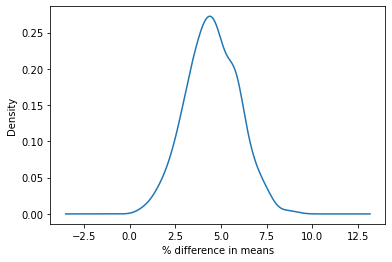

In [15]:
# Creating a list with bootstrapped means for each AB-group
boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_7d = pd.DataFrame(boot_7d)

# Adding a column with the % difference between the two AB-groups
boot_7d['percentage diff'] = (boot_7d['gate_30'] - boot_7d['gate_40']) /  boot_7d['gate_40'] * 100

# Ploting the bootstrap % difference
ax = boot_7d['percentage diff'].plot(kind='kde')
ax.set_xlabel("% difference in means")

# Calculating the probability that 7-day retention is greater when the gate is at level 30
prob = sum(boot_7d['percentage diff'] > 0) / len(boot_7d['percentage diff'] > 0)

# Pretty printing the probability
'{:.1%}'.format(prob)